In [1]:
import os , glob
import matplotlib.pyplot as plt
import numpy as np
from sys import getsizeof
from keras.preprocessing.image import load_img,img_to_array,array_to_img
import cv2
path="D:\\Documents\\Game\\"
jpgfile=[filename for filename in glob.iglob(path + '**/*.png', recursive=True)]
print(len(jpgfile))
jpgfile[35]

C:\Users\CHChen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


115


'D:\\Documents\\Game\\ClickZ\\Screenshot_2018-08-02-12-42-17.png'

In [2]:
img=[]
for j in jpgfile:
    temp_img=cv2.imread(j)
    temp_img=cv2.resize(temp_img[:,:,:],(512,288))
    img.append(temp_img)
img=np.array(img)
img=img/255
print(img.shape)

Ylabel=[i.split("\\")[-2] for i in jpgfile]
Ylabel_onehot=np.zeros((len(Ylabel),5))
for no,category in enumerate(Ylabel):
    if category=="Chat":
        Ylabel_onehot[no,0]=1
    elif category=="ClickZ":
        Ylabel_onehot[no,1]=1
    elif category=="MissionComplete":
        Ylabel_onehot[no,2]=1
    elif category=="NoQuest":
        Ylabel_onehot[no,3]=1
    elif category=="InMulung":
        Ylabel_onehot[no,4]=1

(115, 288, 512, 3)


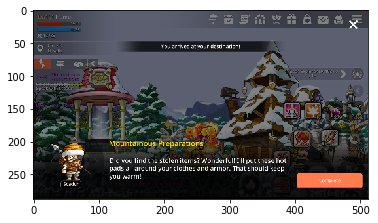

In [3]:
plt.imshow(img[0,:,:,::-1])

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest , Ytrain, Ytest = train_test_split(img,Ylabel_onehot, test_size=0.2)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(92, 288, 512, 3)
(23, 288, 512, 3)
(92, 5)
(23, 5)


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization, Input, Reshape,Conv2DTranspose
from keras.optimizers import Adam
from keras import optimizers
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import plot_model
from keras.models import load_model

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(288,512,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# history=model.fit(Xtrain,Ytrain,batch_size=10,epochs=15,validation_data=(Xtest,Ytest))
history=model.fit(img,Ylabel_onehot,batch_size=20,epochs=35)
model.save("AutoQuest.h5")

Epoch 1/35
115/115 [==============================] - 3s 29ms/step - loss: 1.5970 - acc: 0.2174
Epoch 2/35
115/115 [==============================] - 2s 14ms/step - loss: 1.4607 - acc: 0.2696
Epoch 3/35
115/115 [==============================] - 2s 14ms/step - loss: 1.2322 - acc: 0.3565
Epoch 4/35
115/115 [==============================] - 2s 14ms/step - loss: 1.1884 - acc: 0.4087
Epoch 5/35
115/115 [==============================] - 2s 14ms/step - loss: 1.1211 - acc: 0.4261
Epoch 6/35
115/115 [==============================] - 2s 14ms/step - loss: 0.9834 - acc: 0.4696
Epoch 7/35
115/115 [==============================] - 2s 14ms/step - loss: 0.9003 - acc: 0.5304
Epoch 8/35
115/115 [==============================] - 2s 14ms/step - loss: 0.8845 - acc: 0.5130
Epoch 9/35
115/115 [==============================] - 2s 14ms/step - loss: 0.8572 - acc: 0.4783
Epoch 10/35
115/115 [==============================] - 2s 14ms/step - loss: 0.8221 - acc: 0.5130
Epoch 11/35
115/115 [==================

array([[0., 0., 0., 1., 0.]], dtype=float32)

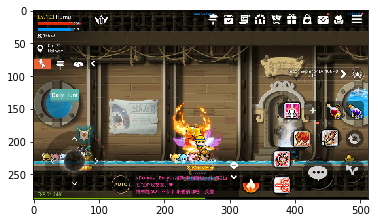

In [6]:
test="C:/Users/CHChen/Nox_share/Image/Screenshot_2018-08-02-13-44-04.png"
temp_img=cv2.imread(test)
temp_img=cv2.resize(temp_img[:,:,:],(512,288))
temp_img=np.expand_dims(temp_img,0)
import matplotlib.pyplot as plt
plt.imshow(temp_img[0,:,:,::-1])
model.predict(temp_img)

array([[0., 1., 0., 0., 0.]], dtype=float32)

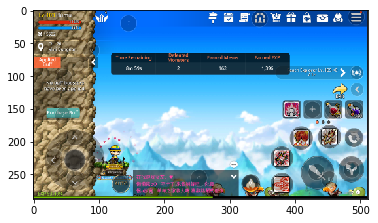

In [12]:
import pyscreenshot as ImageGrab
import win32gui
import numpy as np
import keyboard
import time
import cv2
from IPython.display import display, clear_output
rect=win32gui.GetWindowRect(win32gui.FindWindow(None, "MSM"))
time.sleep(1)
im=ImageGrab.grab(bbox=(rect[0],rect[1]+35,rect[2],rect[3]))
im=np.array(im)
im=cv2.resize(im[:,:,:],(512,288))
im=np.expand_dims(im,0)
whichmax=np.argmax(model.predict(im)[0])
import matplotlib.pyplot as plt
plt.imshow(im[0])
model.predict(im)